<img src ='pic\logo_CNTT.png' width='400px'>
<div align="center">
<h1> MÔN HỌC: KHOA HỌC DỮ LIỆU (7080509) - HỆ CLC </h1>
<h2>Giảng viên giảng dạy: Đặng Văn Nam</h2>

---

<h2> PROJECT: PHÂN TÍCH DỮ LIỆU 1000 CUỐN SÁCH CỦA MỘT CỬA HÀNG</h2>
</div>
<img src ='pic\bookstore.png' width='900px'>

---

**MÔT TẢ BÀI TOÁN - DỮ LIỆU:** 

Dữ liệu của 1000 cuốn sách của một cửa hàng sách hư cấu với các thể loại, lượt đánh giá và giá bán khác nhau

**Title,Book_category,Star_rating,Price,Stock,Quantity**

1. "Title"  :  Tiêu đề sách
2. "Book_category"  :  Thể loại sách
3. "Star_rating"  :  Xếp hạng sao
4. "Price"  :  Giá bán của sách theo bảng Anh
5. "Stock"  :  Tình trạng của sách còn hàng hay không còn hàng
6. "Quantity"  :  Số lượng sách còn lại trong cửa hàng

**MỤC TIÊU PROJECT:** 
Thực hiện đọc - phân tích, trực quan hóa tập dữ liệu để trả lời các câu hỏi liên quan? 

---


<img src='pic/question.jfif' width='150px' align='left'>

**Câu hỏi 1: Thống kê giá bán sách? Cuốn sách nào có giá bán cao nhất - thấp nhất?**

**Câu hỏi 2: Thóng kê lượt đánh giá? Những cuốn sách nào được đánh giá cao nhất - thấp nhất?**

**Câu hỏi 3: Thống kê số lượng sách theo thể loại? Thể loại nào có số sách nhiều nhất - ít nhất?**

**Câu hỏi 4: Thống kê số liệu tình trạng sách còn tồn đọng, từ đó phân tích đưa ra các giải pháp?**


---

# Thành viên nhóm: #
### **Bùi Việt Dũng** - 2121050042 - NT ###
### **Nguyễn Hoài Nam** - 2121050849 ###
### **Trần Văn Phương** - 2121050295 ###

---

## Import Package ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print('Pandas version: ', pd.__version__)
print('Numpy version: ', np.__version__)

Pandas version:  1.4.2
Numpy version:  1.21.5


## 1. Đọc và quan sát dữ liệu
---
Dữ liệu được lưu trữ trong các file CSV.

In [2]:
path = "data/books_scraped.csv"
data_book = pd.read_csv(path)
data_book

,Title,Book_category,Star_rating,Price,Stock,Quantity
0,A Light in the Attic,Poetry,Three,51.77,In stock,22
1,Tipping the Velvet,Historical Fiction,One,53.74,In stock,20
2,Soumission,Fiction,One,50.10,In stock,20
3,Sharp Objects,Mystery,Four,47.82,In stock,20
4,Sapiens: A Brief History of Humankind,History,Five,54.23,In stock,20
...,...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Classics,One,55.53,In stock,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Sequential Art,Four,57.06,In stock,1
997,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,Five,16.97,In stock,1
998,1st to Die (Women's Murder Club #1),Mystery,One,53.98,In stock,1


In [3]:
#Quan sát dữ liệu biến DataFrame
data_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          1000 non-null   object 
 1   Book_category  1000 non-null   object 
 2   Star_rating    1000 non-null   object 
 3   Price          1000 non-null   float64
 4   Stock          1000 non-null   object 
 5   Quantity       1000 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


### Hiển thị 5 bản ghi đầu tiên

In [4]:
data_book.head()

,Title,Book_category,Star_rating,Price,Stock,Quantity
0,A Light in the Attic,Poetry,Three,51.77,In stock,22
1,Tipping the Velvet,Historical Fiction,One,53.74,In stock,20
2,Soumission,Fiction,One,50.10,In stock,20
3,Sharp Objects,Mystery,Four,47.82,In stock,20
4,Sapiens: A Brief History of Humankind,History,Five,54.23,In stock,20


### Hiển thị 5 bản ghi cuối cùng

In [5]:
data_book.tail()

,Title,Book_category,Star_rating,Price,Stock,Quantity
995,Alice in Wonderland (Alice's Adventures in Won...,Classics,One,55.53,In stock,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Sequential Art,Four,57.06,In stock,1
997,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,Five,16.97,In stock,1
998,1st to Die (Women's Murder Club #1),Mystery,One,53.98,In stock,1
999,"1,000 Places to See Before You Die",Travel,Five,26.08,In stock,1


### Loại bỏ thuộc tính không sử dụng trong tập dữ liệu

In [6]:
data_book.drop(['Stock'],axis=1,inplace=True)
data_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          1000 non-null   object 
 1   Book_category  1000 non-null   object 
 2   Star_rating    1000 non-null   object 
 3   Price          1000 non-null   float64
 4   Quantity       1000 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


### Hiển thị các đặc trưng thống kê của dữ liệu số:

In [7]:
data_book.describe()

,Price,Quantity
count,1000.00000,1000.000000
mean,35.07035,8.585000
std,14.44669,5.654622
min,10.00000,1.000000
25%,22.10750,3.000000
50%,35.98000,7.000000
75%,47.45750,14.000000
max,59.99000,22.000000


### Hiển thị các đặc trưng thống kê của dữ liệu Object:

In [8]:
data_book.describe(include='O')

,Title,Book_category,Star_rating
count,1000,1000,1000
unique,999,50,5
top,The Star-Touched Queen,Default,One
freq,2,152,226


### Kiểm tra dữ liệu missing: ==> Không có thuộc tính nào bị missing dữ liệu

In [9]:
data_book.isnull().sum()

Title            0
Book_category    0
Star_rating      0
Price            0
Quantity         0
dtype: int64

### Kiểm tra dữ liệu trùng lặp: ==> Không có bản ghi nào trùng nhau


In [10]:
data_book.duplicated().sum()

0

### Đổi kiểu dữ liệu của Star_rating từ kiểu Object sang kiểu số

In [11]:
star_rate = {'One': 1,
             'Two': 2, 
             'Three': 3,
             'Four': 4, 
             'Five': 5}
data_book['Star_rating'].replace(star_rate, inplace=True)
data_book.head()

,Title,Book_category,Star_rating,Price,Quantity
0,A Light in the Attic,Poetry,3,51.77,22
1,Tipping the Velvet,Historical Fiction,1,53.74,20
2,Soumission,Fiction,1,50.10,20
3,Sharp Objects,Mystery,4,47.82,20
4,Sapiens: A Brief History of Humankind,History,5,54.23,20


## 2. Phân tích và Thống kê dữ liệu

In [12]:
#Hàm hiển thị text trên biểu đồ cột:
def label_bar(bar_plot,bar_label):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.005*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0)

### Câu hỏi 1: Thống kê giá bán sách? Cuốn sách nào có giá bán cao nhất - thấp nhất?

In [13]:
#Đặc trưng thống kê giá bán sách
data_book['Price'].describe()

count    1000.00000
mean       35.07035
std        14.44669
min        10.00000
25%        22.10750
50%        35.98000
75%        47.45750
max        59.99000
Name: Price, dtype: float64

In [14]:
#Sách có giá bán cao nhất
data_book[data_book['Price']==data_book['Price'].max()]

,Title,Book_category,Star_rating,Price,Quantity
648,The Perfect Play (Play by Play #1),Romance,3,59.99,4


In [15]:
#Sách có giá bán thấp nhất
data_book[data_book['Price']==data_book['Price'].min()]

,Title,Book_category,Star_rating,Price,Quantity
638,An Abundance of Katherines,Young Adult,5,10.0,5


In [16]:
#Giá bán sách trung bình
round(data_book['Price'].mean(),2)

35.07

In [17]:
#Số lượng sách có giá bán trên 40 bảng Anh
high_price = data_book[data_book['Price'] > 40]['Title'].count()
high_price

403

In [18]:
#Số lượng sách có giá bán dưới 20 bảng Anh
low_price = data_book[data_book['Price'] < 20]['Title'].count()
low_price

196

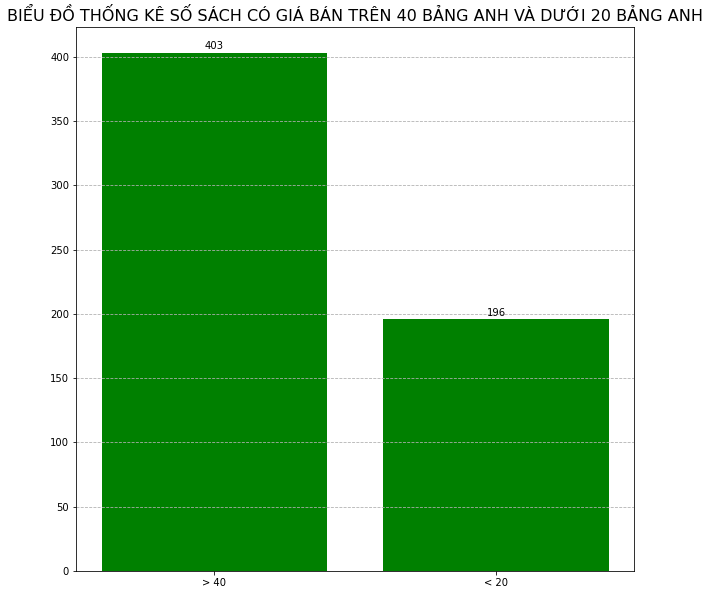

In [19]:
#Trực quan hóa dữ liệu thống kê số lượng sách có giá bán trên 40 bảng Anh và số lượng sách có giá bán dưới 20 bảng Anh
x = ['> 40', '< 20']
y = [high_price, low_price]
plt.figure(figsize = (10,10))
plt.title('BIỂU ĐỒ THỐNG KÊ SỐ SÁCH CÓ GIÁ BÁN TRÊN 40 BẢNG ANH VÀ DƯỚI 20 BẢNG ANH', fontsize=16)
price_bar = plt.bar(x, y, color ='green')
label_bar(price_bar, y)
plt.grid(axis='y', ls='--')
plt.show()

<img src='pic/insight.png' width='250px' align='left'>

**NHẬN XÉT:**
* Giá bán trung bình của 1000 cuốn sách là 35.07 bảng Anh
* Gần nửa số sách của cửa hàng có giá bán trên 40 bảng Anh
* Cuốn sách có giá bán cao nhất là "The Perfect Play (Play by Play #1)" với giá 59.99 bảng Anh
* Cuốn sách có giá bán thấp nhất là "An Abundance of Katherines" với giá 10.0 bảng Anh

### Câu hỏi 2: Thống kê lượt đánh giá? Những cuốn sách nào được đánh giá cao nhất - thấp nhất?

In [20]:
#Số liệu thống kê về lượt đánh giá
book_rate = data_book['Star_rating'].value_counts().sort_index()
book_rate

1    226
2    196
3    203
4    179
5    196
Name: Star_rating, dtype: int64

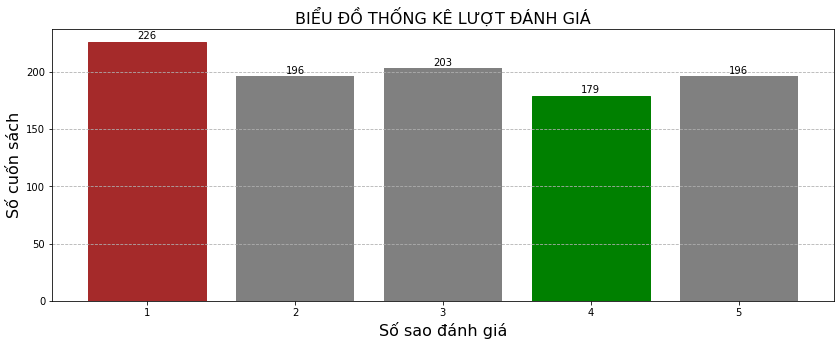

In [21]:
#Trực quan hóa dữ liệu thống kê số lượng sách theo số sao đánh giá
plt.figure(figsize=(14,5))
rate_bar = plt.bar(book_rate.index, book_rate.values, color='gray')
rate_bar[0].set_color('brown')
rate_bar[3].set_color('green')
plt.title('BIỂU ĐỒ THỐNG KÊ LƯỢT ĐÁNH GIÁ', fontsize=16)
plt.ylabel('Số cuốn sách', fontsize=16)
plt.xlabel('Số sao đánh giá', fontsize=16)
label_bar(rate_bar, book_rate.values)
plt.grid(axis='y', ls='--')
plt.show()

In [22]:
#Thống kê danh sách các cuốn sách có đánh giá 1 sao
data_book[['Title', 'Star_rating']][data_book['Star_rating'] == 1]

,Title,Star_rating
1,Tipping the Velvet,1
2,Soumission,1
5,The Requiem Red,1
9,The Black Maria,1
16,Olio,1
...,...,...
988,Charity's Cross (Charles Towne Belles #4),1
990,Bridget Jones's Diary (Bridget Jones #1),1
994,Beyond Good and Evil,1
995,Alice in Wonderland (Alice's Adventures in Won...,1


In [23]:
#Thống kê danh sách các cuốn sách có đánh giá 4 sao
data_book[['Title', 'Star_rating']][data_book['Star_rating'] == 4]

,Title,Star_rating
3,Sharp Objects,4
6,The Dirty Little Secrets of Getting Your Dream...,4
8,The Boys in the Boat: Nine Americans and Their...,4
11,Shakespeare's Sonnets,4
29,Wall and Piece,4
...,...,...
977,Having the Barbarian's Baby (Ice Planet Barbar...,4
978,"Giant Days, Vol. 1 (Giant Days #1-4)",4
986,Choosing Our Religion: The Spiritual Lives of ...,4
991,Bounty (Colorado Mountain #7),4


<img src='pic/insight.png' width='350px' align='left'>

**NHẬN XÉT:**
* Trong 1000 cuốn sách thì số sách có lượt đánh giá 1 sao là nhiều nhất (226 cuốn sách), điển hình một số cuốn sách có đánh giá 1 sao như: "Tipping the Velvet", "Soumission", "The Requiem Red", "The Black Maria", "Olio"...
* Trong 1000 cuốn sách thì số sách có lượt đánh giá 4 sao là ít nhất (179 cuốn sách), một số cuốn sách có đánh giá 4 sao như: "Sharp Objects", "Bounty (Colorado Mountain # 7)", "Wall and Piece", "Shakespeare's Sonnets", "Giant Days, Vol. 1 (Giant Days # 1-4)"...
* Mặc dù có nhiều cuốn sách có lượt đánh giá 1 sao nhưng sự chênh lệch số sao đánh giá giữa các cuốn sách là không nhiều và số cuốn sách có đánh giá 5 sao vẫn có gần 200 cuốn (196 cuốn sách)

### Câu hỏi 3: Thống kê số lượng sách theo thể loại? Thể loại nào có số sách nhiều nhất - ít nhất?

In [24]:
#Số liệu thống kê về thể loại sách
category = data_book['Book_category'].value_counts()
category

Default               152
Nonfiction            110
Sequential Art         75
Add a comment          67
Fiction                65
Young Adult            54
Fantasy                48
Romance                35
Mystery                32
Food and Drink         30
Childrens              29
Historical Fiction     26
Poetry                 19
Classics               19
History                18
Horror                 17
Womens Fiction         17
Science Fiction        16
Science                14
Music                  13
Business               12
Thriller               11
Travel                 11
Philosophy             11
Humor                  10
Autobiography           9
Art                     8
Psychology              7
Religion                7
Spirituality            6
Christian Fiction       6
New Adult               6
Sports and Games        5
Biography               5
Self Help               5
Health                  4
Christian               3
Politics                3
Contemporary

In [25]:
data_book['Book_category'].describe()

count        1000
unique         50
top       Default
freq          152
Name: Book_category, dtype: object

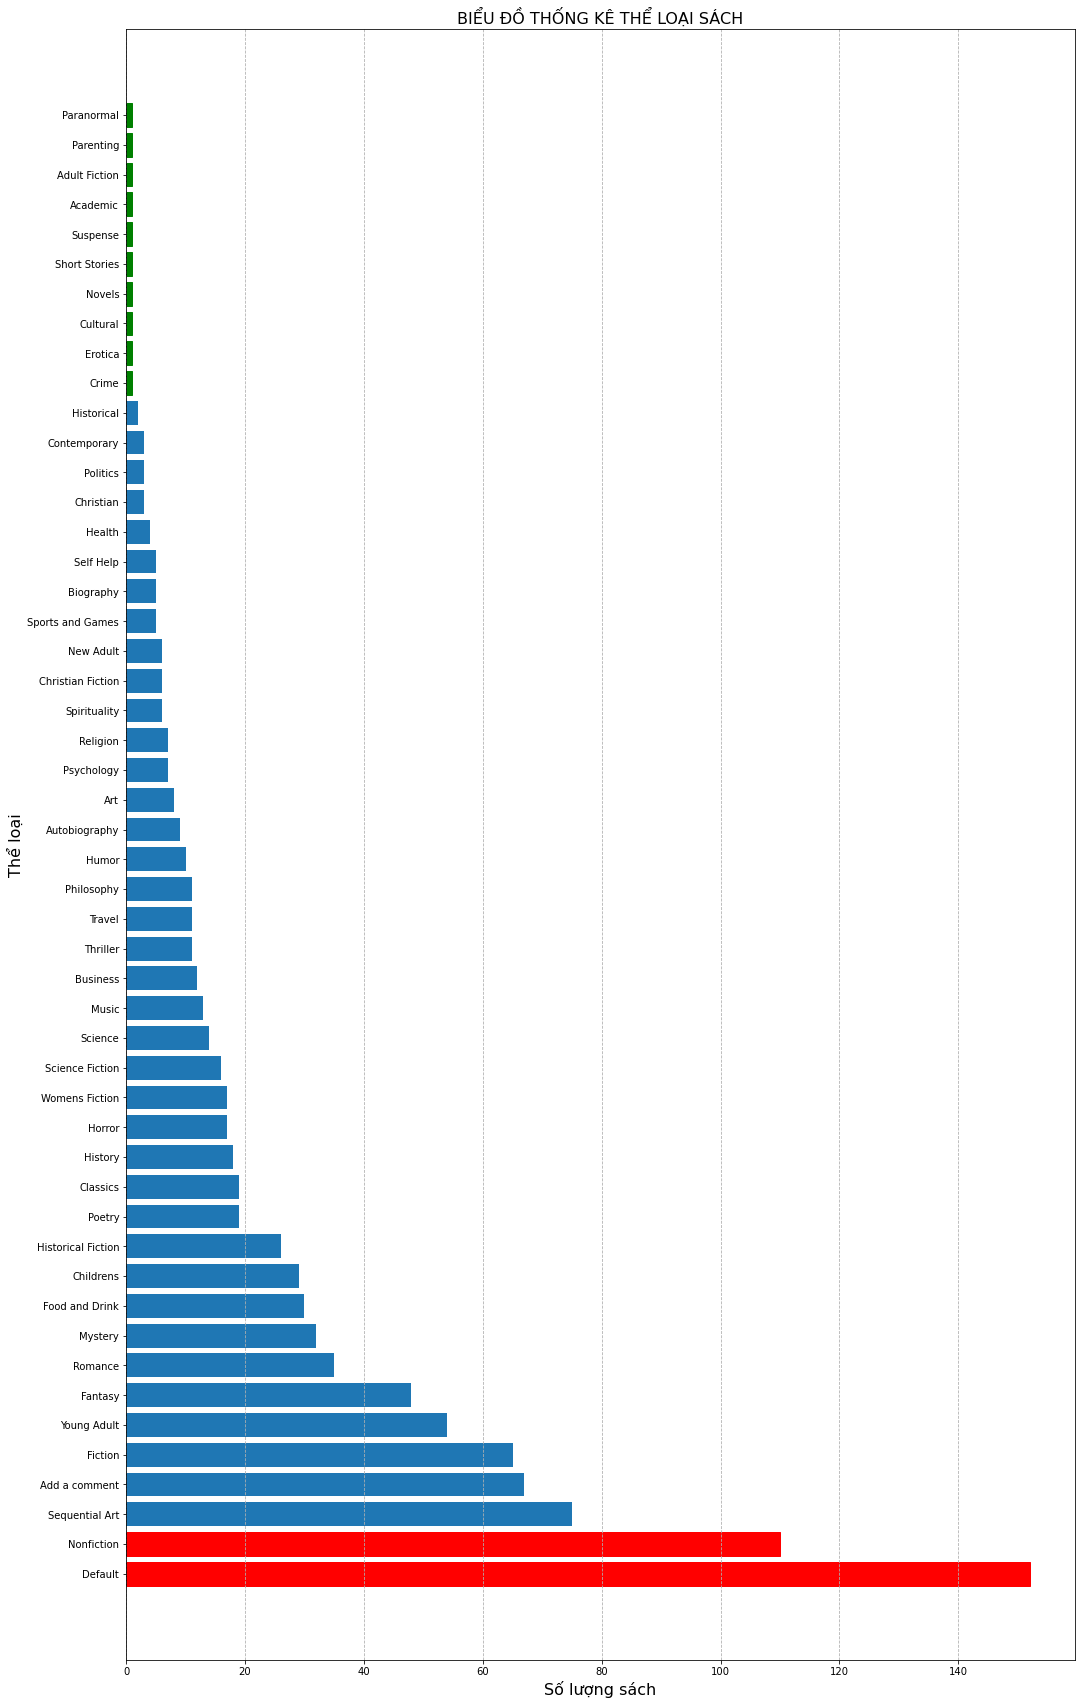

In [26]:
#Trực quan hóa dữ liệu thống kê số lượng sách theo thể loại sách
plt.figure(figsize = (17, 30))
category_bar = plt.barh(category.index, category.values)
for i in range (40,50):
    category_bar[i].set_color('green')
category_bar[0].set_color('red')
category_bar[1].set_color('red')
plt.title('BIỂU ĐỒ THỐNG KÊ THỂ LOẠI SÁCH', fontsize=16)
plt.xlabel('Số lượng sách', fontsize=16)
plt.ylabel('Thể loại', fontsize=16)
plt.grid(axis='x', ls='--')
plt.show()

<img src='pic/insight.png' width='200px' align='left'>

**NHẬN XÉT:**
* 2 thể loại sách có số lượng sách nhiều nhất là "Default" với 152 cuốn sách và "Nonfiction" với 110 cuốn sách
* Các thể loại sách có số lượng sách ít nhất với 1 cuốn sách là: "Crime, Erotica, Cultural, Novels, Short Stories, Suspense, Academic, Adult Fiction, Parenting, Paranormal"

### Câu hỏi 4: Thống kê số liệu tình trạng sách còn tồn đọng, từ đó phân tích đưa ra các giải pháp?

#### Thống kê những sách còn tồn đọng nhiều hơn 15 cuốn

In [27]:
high_quantity = data_book[data_book['Quantity']>=15]
high_quantity

,Title,Book_category,Star_rating,Price,Quantity
0,A Light in the Attic,Poetry,3,51.77,22
1,Tipping the Velvet,Historical Fiction,1,53.74,20
2,Soumission,Fiction,1,50.10,20
3,Sharp Objects,Mystery,4,47.82,20
4,Sapiens: A Brief History of Humankind,History,5,54.23,20
...,...,...,...,...,...
210,Anonymous,Default,4,46.82,15
211,Amy Meets the Saints and Sages,Default,3,18.46,15
212,Amid the Chaos,Cultural,1,36.58,15
213,Amatus,Default,5,50.54,15


###### Lọc ra những cuốn sách có đánh giá 5 sao trong khuôn khổ những cuốn còn tồn đọng đã lọc.

In [28]:
high_quantity_1 = high_quantity[high_quantity['Star_rating']==5]
high_quantity_1

,Title,Book_category,Star_rating,Price,Quantity
4,Sapiens: A Brief History of Humankind,History,5,54.23,20
12,Set Me Free,Young Adult,5,17.46,19
13,Scott Pilgrim's Precious Little Life (Scott Pi...,Sequential Art,5,52.29,19
14,Rip it Up and Start Again,Music,5,35.02,19
23,Chase Me (Paris Nights #2),Romance,5,25.27,19
24,Black Dust,Romance,5,34.53,19
28,Worlds Elsewhere: Journeys Around Shakespeareâ...,Nonfiction,5,40.30,18
30,The Four Agreements: A Practical Guide to Pers...,Spirituality,5,17.66,18
32,The Elephant Tree,Thriller,5,23.82,18
34,Sophie's World,Philosophy,5,15.94,18


##### Kiểm tra số lượng tồn đọng ở mỗi loại sách '5 sao'

In [29]:
quantity_in_five_star_1 = high_quantity_1[high_quantity_1['Quantity']==20]
print('Số loại sách 5 sao còn tồn kho 20 quyển:', quantity_in_five_star_1['Quantity'].count())

quantity_in_five_star_2 = high_quantity_1[high_quantity_1['Quantity']==19]
print('Số loại sách 5 sao còn tồn kho 19 quyển:', quantity_in_five_star_2['Quantity'].count())

quantity_in_five_star_3 = high_quantity_1[high_quantity_1['Quantity']==18]
print('Số loại sách 5 sao còn tồn kho 18 quyển:', quantity_in_five_star_3['Quantity'].count())

quantity_in_five_star_4 = high_quantity_1[high_quantity_1['Quantity']==17]
print('Số loại sách 5 sao còn tồn kho 17 quyển:', quantity_in_five_star_4['Quantity'].count())

quantity_in_five_star_5 = high_quantity_1[high_quantity_1['Quantity']==16]
print('Số loại sách 5 sao còn tồn kho 16 quyển:', quantity_in_five_star_5['Quantity'].count())

quantity_in_five_star_6 = high_quantity_1[high_quantity_1['Quantity']==15]
print('Số loại sách 5 sao còn tồn kho 15 quyển:', quantity_in_five_star_6['Quantity'].count())

Số loại sách 5 sao còn tồn kho 20 quyển: 1
Số loại sách 5 sao còn tồn kho 19 quyển: 5
Số loại sách 5 sao còn tồn kho 18 quyển: 4
Số loại sách 5 sao còn tồn kho 17 quyển: 2
Số loại sách 5 sao còn tồn kho 16 quyển: 12
Số loại sách 5 sao còn tồn kho 15 quyển: 17


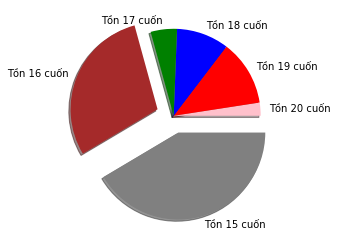

In [40]:
x = np.asarray(['Tồn 20 cuốn', 'Tồn 19 cuốn', 'Tồn 18 cuốn', 'Tồn 17 cuốn', 'Tồn 16 cuốn', 'Tồn 15 cuốn'])
y = np.array([1,5,4,2,12,17])
explode = [0,0,0,0,0.2,0.2]
colors = ['Pink', 'Red', 'Blue', 'Green', 'Brown', 'Gray']

plt.pie(y, labels=x, explode = explode, colors = colors, shadow = True)
plt.show()

##### - Qua biểu đồ tròn quan sát được:
1. Số loại sách còn thừa trong đánh giá 5 sao cũng nằm trong khoảng chấp nhận được, phần lớn là các loại sách còn tồn trong khoảng 15, 16 theo như đánh giá thì sản phẩm cũng ít bị tồn đọng nhiều, chấp nhận được

###### Lọc ra những cuốn sách có đánh giá 3, 4 sao trong khuôn khổ những cuốn còn tồn đọng đã lọc.

In [31]:
four_and_three_star_raiting = high_quantity[high_quantity['Star_rating'].isin([3,4])]
four_and_three_star_raiting

,Title,Book_category,Star_rating,Price,Quantity
0,A Light in the Attic,Poetry,3,51.77,22
3,Sharp Objects,Mystery,4,47.82,20
6,The Dirty Little Secrets of Getting Your Dream...,Business,4,33.34,19
7,The Coming Woman: A Novel Based on the Life of...,Default,3,17.93,19
8,The Boys in the Boat: Nine Americans and Their...,Default,4,22.60,19
...,...,...,...,...,...
201,Daring Greatly: How the Courage to Be Vulnerab...,Nonfiction,3,19.43,15
202,Close to You,Christian Fiction,4,49.46,15
204,Big Magic: Creative Living Beyond Fear,Nonfiction,3,30.80,15
210,Anonymous,Default,4,46.82,15


###### Thống kê số lượng sách còn tồn đọng trên 15 cuốn so với số sao đánh giá

In [32]:
five_star_rating = high_quantity_1['Title'].count()
print('Số lượng sách được đánh giá 5 sao còn tồn đọng nhiều: ', five_star_rating)

Số lượng sách được đánh giá 5 sao còn tồn đọng nhiều:  41


In [33]:
four_star_raiting = four_and_three_star_raiting[four_and_three_star_raiting['Star_rating']==4]
four_star_raiting_count = four_star_raiting.count()
print('Số loại sách còn tồn nhiều được đánh giá 4 sao: ', four_star_raiting_count['Title'])

Số loại sách còn tồn nhiều được đánh giá 4 sao:  40


In [34]:
three_star_raiting = four_and_three_star_raiting[four_and_three_star_raiting['Star_rating']==3]
three_star_raiting_count = three_star_raiting.count()
print('Số loại sách còn tồn nhiều được đánh giá 3 sao: ', three_star_raiting_count['Title'])

Số loại sách còn tồn nhiều được đánh giá 3 sao:  38


In [35]:
low_star_rating = high_quantity[high_quantity['Star_rating']<3]
print('Số loại sách có đánh giá thấp (1,2 sao) nhưng vẫn còn tồn đọng nhiều: ',low_star_rating['Star_rating'].count())

Số loại sách có đánh giá thấp (1,2 sao) nhưng vẫn còn tồn đọng nhiều:  96


<img src='pic/insight.png' width='300px' align='left'>

**NHẬN XÉT:**
1. Nhìn chung, tình trạng tồn đọng sách trong cửa hàng không quá nhiều
2. Giải pháp giải quyết các loại sách trong kho còn tồn đọng nhiều trên 15 cuốn có đánh giá rất tốt (5 Sao):
  * Có thể sách không quá hợp với đa số người dùng 
    => có thể quảng bá những loại sách trên để hướng tới những người dùng hợp với sách
  * Có thể cuốn sách rất hay, đa số người dùng đều thích nhưng có thể giá thành đang quá cao
    => Có thể đưa ra các khuyến mãi dành riêng cho các loại sách này

3. Như trên ta đang thấy số loại sách tồn đọng của sách 3 và 4 sao khá là ngang nhau, thay vì bỏ quá nhiều công sức để quảng bá những cuốn sách này thì có thể giảm giá những loại sách này. Để nhằm giải quyết hàng tồn kho '3 và 4 sao' nhanh nhất có thể.

4. Đối với các loại sách có đánh giá thấp còn tồn đọng thiều thì thay vì giảm giá như các mặt hàng tồn kho 3 và 4 sao, hay quảng bá các loại sách tồn kho 5 sao thì:
    - Có thể tặng kèm với những cuốn sách 5 sao, hoặc 4 sao đã được giảm giá.
    - Có thể là các các phần được tặng miễn phí khi khách hàng thuộc dạng thân thiết, hoặc combo đi kèm ( Ví dụ: Mua trên 5 quyển tặng 1 quyển v,v....)